# description  

1/ new user --> user's model is global model  
2/ when a user vote a book --> update user's model  
3/ user model --> list book to recommend

# Module

In [95]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge

from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt

# Processing

In [96]:
df = pd.read_csv('50_genre_800_author_wr_gt_4.csv', delimiter=',')

df = df[['title', 'weighted_rating', 'author']]

print(df.shape)
df.head(3)

(2929, 3)


,title,weighted_rating,author
0,Harry Potter Collection,4.651838,J.K. Rowling
1,"The Way of Kings, Part 2",4.625966,Brandon Sanderson
2,Harry Potter and the Deathly Hallows,4.619212,J.K. Rowling


In [97]:
df

,title,weighted_rating,author
0,Harry Potter Collection,4.651838,J.K. Rowling
1,"The Way of Kings, Part 2",4.625966,Brandon Sanderson
2,Harry Potter and the Deathly Hallows,4.619212,J.K. Rowling
3,Harry Potter and the Order of the Phoenix (Har...,4.602790,J.K. Rowling
4,The Lord of the Rings: The Art of the Fellowsh...,4.583587,Gary Russell
...,...,...,...
2924,Saint,4.000416,Ted Dekker
2925,Wrath of a Mad God,4.000403,Raymond E. Feist
2926,Scholar,4.000370,L.E. Modesitt Jr.
2927,Ghostmaker,4.000114,Dan Abnett


In [98]:
author = df['author'].values
author

array(['J.K. Rowling', 'Brandon Sanderson', 'J.K. Rowling', ...,
       'L.E. Modesitt Jr.', 'Dan Abnett', 'Ryk Brown'], dtype=object)

In [99]:
def cut_off(s):
   return s.split(',')

In [118]:
tf_transformed = TfidfVectorizer(tokenizer=cut_off)
X = tf_transformed.fit_transform(author)
# df['feature vector'] = list(X.toarray())

In [119]:
X

<2929x800 sparse matrix of type '<class 'numpy.float64'>'
	with 3596 stored elements in Compressed Sparse Row format>

In [120]:
tf_transformed.get_feature_names()

['abbi glines',
 'abec',
 'abigail roux',
 'adam makos',
 'addison moore',
 'adrian alphona',
 'agatha christie',
 'ai yazawa',
 'ais',
 'akira toriyama',
 'akira watanabe',
 'al dempster',
 'alan moore',
 'albert camus',
 'albert uderzo',
 'aleatha romig',
 'alethea nibley',
 'alex kendrick',
 'alex maleev',
 'alex ross',
 'alexander pushkin',
 'alexandra bracken',
 'alexis eckerman',
 'alexis kirsch',
 'alfredo alcalã¡',
 'ally carter',
 'alton brown',
 'amin maalouf',
 'amy a. bartol',
 'amy lane',
 'andrea hirata',
 'andreas helweg',
 'andrew       peterson',
 'andrew hurley',
 'andrzej sapkowski',
 'angela y. davis',
 'angie sage',
 'ann aguirre',
 'ann rule',
 'anne carson',
 'anne lamott',
 'anne mccaffrey',
 'anne rice',
 'annie barrows',
 'annie dillard',
 'annie wu',
 'anonymous',
 'anthea bell',
 'antonina w. bouis',
 'armistead maupin',
 'arnold schwarzenegger',
 'art spiegelman',
 'arthur conan doyle',
 'arthur rimbaud',
 'ashley antoinette',
 'athena nibley',
 'atsuko asa

In [121]:
# df.index = df['title']
# df = df[['weighted_rating', 'feature vector']]
# df.head()

# Model

split data

In [122]:
# X = df['feature vector'].tolist()
y = df['weighted_rating'].values

In [123]:
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.decomposition import TruncatedSVD

In [137]:
X_truncated = TruncatedSVD(n_components=799).fit_transform(X)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
model = SVR(kernel='rbf', C=0.5, epsilon=0.01, tol=0.001)

model.fit(X_train, y_train)

SVR(C=0.5, epsilon=0.01)

In [112]:
model.score(X_train, y_train)

0.2247284362467692

In [143]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [144]:
np.save('../data/author_features', X.toarray())

In [145]:
np.load('../data/author_features.npy').shape

(2929, 800)

In [146]:
X.min()

0.0

In [147]:
X.max()

1.0

# Evaluate model

r2_score: 0.08
mse: 0.01


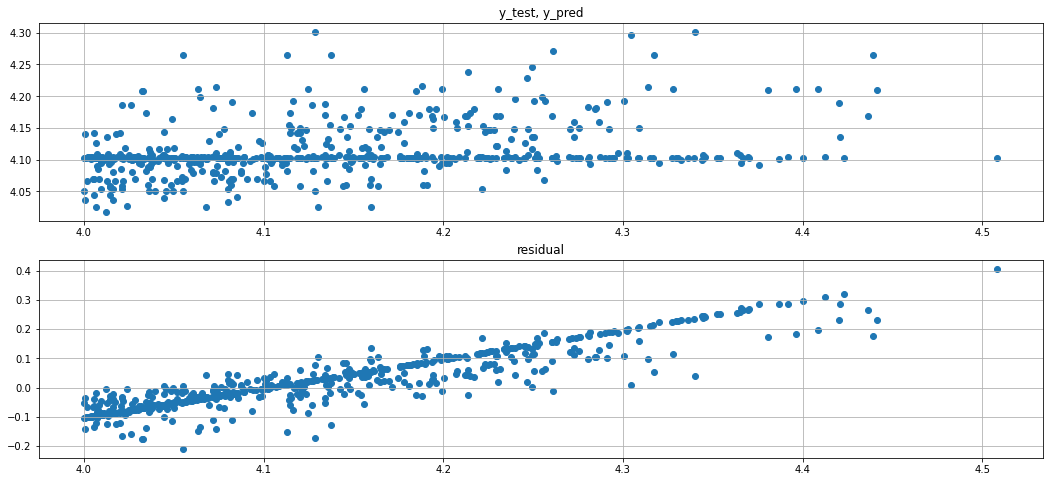

In [92]:
y_pred = model.predict(X_test)
print('r2_score: {:.2f}'.format(r2_score(y_test, y_pred)))
print('mse: {:.2f}'.format(mean_squared_error(y_test, y_pred)))

plt.figure(figsize = (18, 8))


ax1 = plt.subplot(211)
ax1.set_title('y_test, y_pred')
ax1.scatter(y_test, y_pred)
plt.grid()

ax2 = plt.subplot(212)
ax2.set_title('residual')
ax2.scatter(y_test, y_test - y_pred)
plt.grid()

plt.show()

# print(pd.DataFrame(np.array([y_test, y_pred]).T, columns=['true', 'pred']))

# recommend after voting

In [17]:
df['pred_global'] = model.predict(X)

recommend_author:
    - weight_author
    - author_id
    - user_id

In [ ]:
df.iloc[df['pred_global'].nlargest(10).index]

,title,weighted_rating,author,feature vector,pred_global
0,Harry Potter Collection,4.651838,J.K. Rowling,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.614966
2,Harry Potter and the Deathly Hallows,4.619212,J.K. Rowling,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.614966
3,Harry Potter and the Order of the Phoenix (Har...,4.602790,J.K. Rowling,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.614966
63,The Hobbit: An Unexpected Journey - Visual Com...,4.400067,Jude Fisher,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.531475
443,The Lord of the Rings: The Two Towers: Visual ...,4.244738,Jude Fisher,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.531475
15,The Complete Novels,4.494825,Jane Austen,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.461730
1783,Sense and Sensibility,4.079265,Jane Austen,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.461730
13,The Lord of the Rings: The Fellowship of the R...,4.505779,"Jude Fisher,J.R.R. Tolkien","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.449937
8,The Complete Maus,4.516693,Art Spiegelman,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.417915
131,Maus II: A Survivor's Tale: And Here My Troubl...,4.347850,Art Spiegelman,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.417915


## replace vote and retraining

In [ ]:
df['weighted_rating'][94] = 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['weighted_rating'][0]

1.0

retrain

In [ ]:
X = df['feature vector'].tolist()
y = df['weighted_rating'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Ridge(alpha= 0.1)

model.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
df['pred_local'] = model.predict(X)

In [ ]:
df.iloc[df['pred_local'].nlargest(10).index]

,title,weighted_rating,author,feature vector,pred_global,pred_local
63,The Hobbit: An Unexpected Journey - Visual Com...,4.400067,Jude Fisher,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.531475,4.528696
443,The Lord of the Rings: The Two Towers: Visual ...,4.244738,Jude Fisher,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.531475,4.528696
15,The Complete Novels,4.494825,Jane Austen,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.461730,4.461328
1783,Sense and Sensibility,4.079265,Jane Austen,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.461730,4.461328
13,The Lord of the Rings: The Fellowship of the R...,4.505779,"Jude Fisher,J.R.R. Tolkien","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.449937,4.449709
8,The Complete Maus,4.516693,Art Spiegelman,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.417915,4.417704
131,Maus II: A Survivor's Tale: And Here My Troubl...,4.347850,Art Spiegelman,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.417915,4.417704
1361,"Barefoot Gen, Volume One: A Cartoon Story of H...",4.120554,Art Spiegelman,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.417915,4.417704
2334,"MetaMaus: A Look Inside a Modern Classic, Maus",4.037655,Art Spiegelman,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.417915,4.417704
46,"Locke & Key, Vol. 5: Clockworks",4.419811,"Joe Hill,Gabriel RodrÃ­guez","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.391252,4.391119


In [ ]:
df[df['author'] == 'J.K. Rowling']

,title,weighted_rating,author,feature vector,pred_global,pred_local
0,Harry Potter Collection,1.000000,J.K. Rowling,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.614966,3.545041
2,Harry Potter and the Deathly Hallows,4.619212,J.K. Rowling,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.614966,3.545041
3,Harry Potter and the Order of the Phoenix (Har...,4.602790,J.K. Rowling,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.614966,3.545041


In [ ]:
df[df['author'] == 'Kristen Ashley']

,title,weighted_rating,author,feature vector,pred_global,pred_local
20,Rock Chick Regret,1.000000,Kristen Ashley,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.227054,4.080293
40,Rock Chick Revenge,5.000000,Kristen Ashley,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.227054,4.080293
56,At Peace,4.408396,Kristen Ashley,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.227054,4.080293
67,Rock Chick Renegade,4.396510,Kristen Ashley,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.227054,4.080293
74,Rock Chick Revolution,4.386773,Kristen Ashley,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.227054,4.080293
86,Lady Luck,4.375777,Kristen Ashley,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.227054,4.080293
94,Motorcycle Man,3.000000,Kristen Ashley,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.227054,4.080293
105,Rock Chick Reckoning,4.365524,Kristen Ashley,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.227054,4.080293
118,Sweet Dreams,4.355528,Kristen Ashley,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.227054,4.080293
161,The Golden Dynasty,4.336189,Kristen Ashley,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.227054,4.080293


# recommend  

- luu mot vector rating cua user  
- vector luu mo hinh user  

In [ ]:
from tempfile import TemporaryFile

In [ ]:
%%time
np.save('X', df['feature vector'].values)

CPU times: user 32.1 ms, sys: 27.2 ms, total: 59.3 ms
Wall time: 62.4 ms


In [ ]:
df['feature vector'].values

array([array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.,

In [ ]:
type([0])

numpy.ndarray

In [ ]:
%%time
np.savez(feature, X = df['feature vector'].values)

CPU times: user 54.3 ms, sys: 32 ms, total: 86.3 ms
Wall time: 94.3 ms


In [ ]:
%%time
np.load('author_ft.npy')

CPU times: user 2.02 ms, sys: 5.89 ms, total: 7.9 ms
Wall time: 8.53 ms


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])